# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가를 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 **전처리**, **배치 크키**, **shuffling**등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공

## Dataset API 사용
1. **Dataset 생성**
    - raw dataset을 지정 (Loading)
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 메모리의 리스트, 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

2. **제공 데이터 전처리**
    - **map(함수)**: 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - **filter(함수)**: 특정 조건의 데이터만 제공하도록 처리.
        - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.

3. **데이터 제공 설정 관련**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    - **shuffle(buffer 크기)**: dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다. (에폭단위)
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.

##### Tensor
- TensorFlow의 기본 data type. 
- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.

In [1]:
import tensorflow as tf
import numpy as np

t = tf.constant([1,2,3],dtype='float32')
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

#### tensor => numpy 변환

In [2]:
a = t.numpy()  # Tensor객체.numpy
a

array([1., 2., 3.], dtype=float32)

#### numpy/list => tensor 변환

In [3]:
t2 = tf.constant(a)
t2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [5]:
t3 = tf.convert_to_tensor(a)
t3

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [6]:
raw_data1 = np.arange(10)
raw_data1  # ndarray -> 메모리

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Dataset 생성

In [7]:
# 메모리의 ndarray(Tensor)들을 읽어 들이는 dataset을 생성. Dataset.from_tensor_slices(변수) 클래스 메소드를 사용

dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
print(type(dataset))

# Dataset은 생성시 데이터를 읽어오거나 처리하지 않는다
# 그 데이터셋을 사용하는 시점(모델학습, 평가)에 읽어온다 => Lazy 실행

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [8]:
# Dataset들은 iterable 타입 (for in 문에서 사용할 수 있다)
# for in 문 Datast이 가지고 있는 원소들(데이터들)을 하나씩(batch 단위) 제공한다
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


##### x, y 묶어서 제공
- 두개 이상의 데이터셋을 묶어서 제공할 경우 Tuple로 묶어준다.
    - Dataset이 feeding 할 때는 같은 index의 값들을 tuple로 묶어서 제공 (zip()과 동일)

In [9]:
raw_data2 = np.arange(10,20)
raw_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [10]:
data2 = tf.data.Dataset.from_tensor_slices((raw_data1,raw_data2))
for X,y in data2:
    print(X,y)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


#### take
- Dataset의 값을 지정한 개수만큼만 조회

In [11]:
dataset3 = dataset.take(3) 
print(type(dataset3))
for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


##### shuffle

In [12]:
dataset4 = dataset.shuffle(10) # buffer size:10 완전셔플
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)


##### batch
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.
    - Train dataset을 만들때 True로 설정하여 항상 일정한 batch size로 학습할 수 있도록 한다. drop 되는 데이터는 다른 epoch을 반복할 때 사용된다.

In [13]:
dataset5 = dataset.batch(3, drop_remainder = True)
print(type(dataset5))
for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)


In [14]:
dataset6 = dataset.shuffle(10).batch(3)
for d in dataset6:
    print(d)

tf.Tensor([2 4 3], shape=(3,), dtype=int32)
tf.Tensor([9 6 1], shape=(3,), dtype=int32)
tf.Tensor([8 7 5], shape=(3,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)


##### repeat

In [15]:
dataset7 = dataset.repeat(3) # 반복횟수 생략: 무한 반복
print(type(dataset7))
for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
t

In [16]:
dataset8 = dataset.shuffle(10).batch(5).repeat(3)
for data in dataset8:
    print(data)

tf.Tensor([0 6 2 9 8], shape=(5,), dtype=int32)
tf.Tensor([1 4 7 3 5], shape=(5,), dtype=int32)
tf.Tensor([6 3 8 0 9], shape=(5,), dtype=int32)
tf.Tensor([2 4 5 1 7], shape=(5,), dtype=int32)
tf.Tensor([3 1 0 6 7], shape=(5,), dtype=int32)
tf.Tensor([9 8 2 5 4], shape=(5,), dtype=int32)


##### map

In [17]:
def mapping_func(x):
    #  dataset의 원소를 하나 받아서 처리하는 함수
    # 매개변수: 원소개수에 맞춰서 변수를 선언
    # 반환값: 받은 원소를 처리한 값
    return x**2

dataset9 = dataset.map(mapping_func)
print(type(dataset9))
for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [18]:
def mapping_func2(x, y):
    return x**3, y

dataset2 = tf.data.Dataset.from_tensor_slices((raw_data1, raw_data2))
dataset10 = dataset2.map(mapping_func2)

for data in dataset10:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [19]:
dataset12 = dataset2.map(lambda x, y: (x**3, y**2))
for data in dataset12:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


##### filter

In [20]:
def filter_func(x):
    #  filter 함수: 제공할 데이터의 조건정의. 이 조건을 만족하는(True)인 원소들만 모델에 제공
    #  매개변수: Dataset으로부터 원소를 받을 변수
    #  반환: bool
    return x%2 == 0 

dataset13 = dataset.filter(filter_func)
print(type(dataset13))
for data in dataset13:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.FilterDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


In [21]:
dataset14 = dataset.filter(lambda x : x > 5)
for data in dataset14:
    print(data)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


##### 종합

In [22]:
raw_data = np.arange(-10,11)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data)\
                               .filter(lambda x:x>=0)\
                               .map(lambda y:y+10)\
                               .shuffle(raw_data.size)\
                               .batch(3)

for data in dataset_final:
    print(data)

tf.Tensor([13 18 12], shape=(3,), dtype=int32)
tf.Tensor([19 16 14], shape=(3,), dtype=int32)
tf.Tensor([20 10 15], shape=(3,), dtype=int32)
tf.Tensor([17 11], shape=(2,), dtype=int32)


# 문제 유형별 MLP 네트워크
- Multi Layer Perceptron (Deep Neural Network - DNN)
    - Fully Connected Layer(Dense Layer)로 구성된 네트워크
        - 모든 입력 Feature에 가중합을 계산해서 처리하는 Node(Unit, Neuron)들로 구성된 Layer

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [23]:
import numpy as np

import tensorflow as tf
from tensorflow import keras

# Layer 클래스들을 제공하는 모듈
from tensorflow.keras import layers

In [24]:
# random seed 설정.
np.random.seed(0)  #넘파이(dataset) random seed
tf.random.set_seed(0) # Tensorflow(모델) random seed

##### 데이터 로딩

In [25]:
(train_X,train_y), (test_X,test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape,test_X.shape)
print(train_y.shape,test_y.shape)

(404, 13) (102, 13)
(404,) (102,)


##### 하이퍼파라미터, 변수 정의

In [26]:
# 하이퍼파라미터 - 튜닝대상 (변경될 가능이 높은 변수) => 한군데 몰아서 선언하는 것이 좋다.
LEARNING_RATE = 0.001  # 학습률
N_EPOCHS  = 200        # epoch수: traindataset을 몇번 학습할지 횟수.
N_BATCHS = 32          # batch size: 1 step당 몇개의 데이터를 학습할지 (2의 거듭제곱한 값)

# 사용할 변수를 미리선언
N_TRAIN = train_X.shape[0]  # train data의 개수
N_TEST = test_X.shape[0]    # test data의 개수

##### X, y 전처리
- MLP는 선형모델을 기반으로 하므로 Feature scaling을 해준다.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

##### Dataset 생성

In [28]:
# train set을 위한 dataset을 생성

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y))\
                                .shuffle(N_TRAIN)\
                                .batch(N_BATCHS, drop_remainder=True)  
            #(X_train, y_train)을 묶어서 제공.
            # shuffle -> epoch단위로 shuffle을 실행.
            # batch size설정. Train set 에서는 보통 drop_remainder=True로 설정. 각 step마다 동일 개수의 데이터셋을 학습하도록 하기 위해.

# validation dataset -> 학습하는 도중에 검증데이터로 사용할 dataset (생략)
    
# 최종 평가시 사용할 데이터셋
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS) 
# test set의 batch_size : 전체 데이터를 묶어서 검증하는 것이 아니라 batch_size 개수별로 검증해서 그 평균을 최종 평가 결과로 반환.

##### 모델 구현
1. 모델을 생성 - Sequential 방식
2. 모델에 Layer를 순서대로 추가
    - Input Layer
    - Hidden Layer 들 (layer의 unit수, layer의 개수 => 튜닝대상 (개수가 많을 수록 복잡한 모델-overfitting발생할 수 있다.) 
    - Output Layer
    
3. 학습을 위해서 compile

In [29]:
def create_housing_model():
    
    model = keras.Sequential()
#     1. Input Layer
#     model.add(layers.InputLayer((13, )))  #Input Layer 추가 1. -> InputLayer생성=>Feature shape을 지정
# Input Layer 추가 2 -> 첫번째 hidden layer추가하면서 input_shape 속성에 Feature에 shape을 지정
    
#     2. Hidden layer 추가.
#  DenseLayer: units - unit의 개수, activation: 활성함수
#  DenseLayer의 unit수는 점점 개수를 줄여나간다.(관례적으로), 
    model.add(layers.Dense(units=128, activation='relu', input_shape=(13,))) 
    model.add(layers.Dense(units=64, activation='relu'))
    model.add(layers.Dense(units=32, activation='relu'))
    model.add(layers.Dense(units=16, activation='relu'))
    
#     3. Output Layer 추가
#    회귀문제에대한 output layer  - units: 추론한 결과값(정답)에 개수에 맞춘다. - 집값1개 (unit=1), activation=None(기본): 지정하지 않는다.
    model.add(layers.Dense(units=1))
    
    return model

#### 리스트를 이용하여 모델 생성

In [30]:
def create_housing_model2():
#     모델에 추가할 layer들을 리스트로 묶어서 Sequential 생성할때 넣어준다.
    model = keras.Sequential([
        layers.Dense(units=128, activation='relu', input_shape=(13,)),
        layers.Dense(units=64, activation='relu'),
        layers.Dense(units=32, activation='relu'),
        layers.Dense(units=16, activation='relu'),
        layers.Dense(units=1)        
    ])
    return model

In [31]:
# 모델생성
model = create_housing_model()

# 모델 컴파일 - 모델을 학습할 수 있게 만들어 준다. => 모델에 optimizer와 loss함수를 추가.
# 회귀문제를 위한 모델 컴파일 -> loss: mse(mean squared error)
# optimizer=옵티마이저 객체-learning rate등 설정을 할경우., 문자열-기본설정을 사용할 경우. ("adam")
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse')

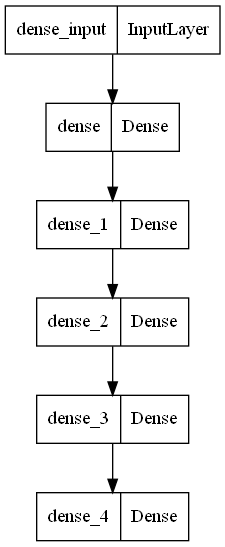

In [32]:
keras.utils.plot_model(model)

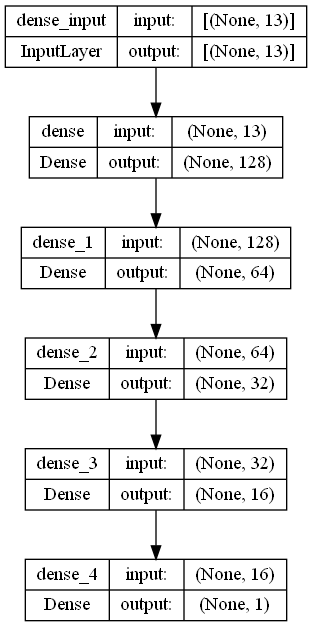

In [33]:
keras.utils.plot_model(model,show_shapes=True)
# 각 Layer의 input shape와 Output shape를 같이 시각화

##### 학습(Train)

In [34]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=test_dataset)
# Data set 을 이용해서 학습할 경우 validation_split을 사용할 수 없다

Epoch 1/200
12/12 [==============================] - 1s 20ms/step - loss: 577.3931 - val_loss: 588.7253
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 535.2087 - val_loss: 528.5536
Epoch 3/200
12/12 [==============================] - 0s 8ms/step - loss: 449.3872 - val_loss: 395.9595
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 285.8768 - val_loss: 178.5862
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 109.0839 - val_loss: 73.3983
Epoch 6/200
12/12 [==============================] - 0s 8ms/step - loss: 65.2825 - val_loss: 45.6336
Epoch 7/200
12/12 [==============================] - 0s 7ms/step - loss: 39.5779 - val_loss: 34.2212
Epoch 8/200
12/12 [==============================] - 0s 7ms/step - loss: 28.1576 - val_loss: 27.1693
Epoch 9/200
12/12 [==============================] - 0s 7ms/step - loss: 23.3588 - val_loss: 25.1919
Epoch 10/200
12/12 [==============================] - 0s 8ms/step - loss: 19.0858

Epoch 82/200
12/12 [==============================] - 0s 7ms/step - loss: 5.7337 - val_loss: 17.1001
Epoch 83/200
12/12 [==============================] - 0s 7ms/step - loss: 5.6795 - val_loss: 16.5776
Epoch 84/200
12/12 [==============================] - 0s 7ms/step - loss: 5.5922 - val_loss: 16.6508
Epoch 85/200
12/12 [==============================] - 0s 8ms/step - loss: 5.4201 - val_loss: 16.0321
Epoch 86/200
12/12 [==============================] - 0s 7ms/step - loss: 5.3622 - val_loss: 17.0003
Epoch 87/200
12/12 [==============================] - 0s 8ms/step - loss: 5.2731 - val_loss: 15.6925
Epoch 88/200
12/12 [==============================] - 0s 7ms/step - loss: 5.2827 - val_loss: 17.1606
Epoch 89/200
12/12 [==============================] - 0s 7ms/step - loss: 5.2929 - val_loss: 15.9560
Epoch 90/200
12/12 [==============================] - 0s 7ms/step - loss: 5.1564 - val_loss: 15.0372
Epoch 91/200
12/12 [==============================] - 0s 8ms/step - loss: 5.1472 - val_loss

##### 결과 시각화

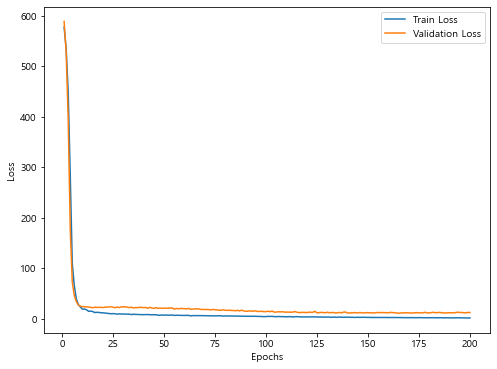

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

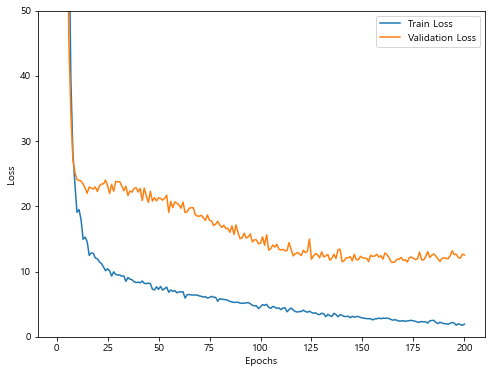

In [37]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')

plt.ylim(0,50)  #y축 값의 범위를 제한

plt.legend()
plt.show()

##### 최종 테스트

In [38]:
loss = model.evaluate(test_dataset)
print(loss, np.sqrt(loss))

4/4 [==============================] - 0s 5ms/step - loss: 12.5388
12.538814544677734 3.5410188568655965


##### 새로운 데이터 추론

In [39]:
new_data = X_test[:5]
new_data.shape

(5, 13)

In [40]:
# model.predict(추론한 Feature): 추론결과
pred = model.predict(new_data)

1/1 [==============================] - 0s 100ms/step


In [41]:
 pred

array([[ 8.294175],
       [18.184338],
       [20.61454 ],
       [31.851929],
       [24.614595]], dtype=float32)

In [42]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:
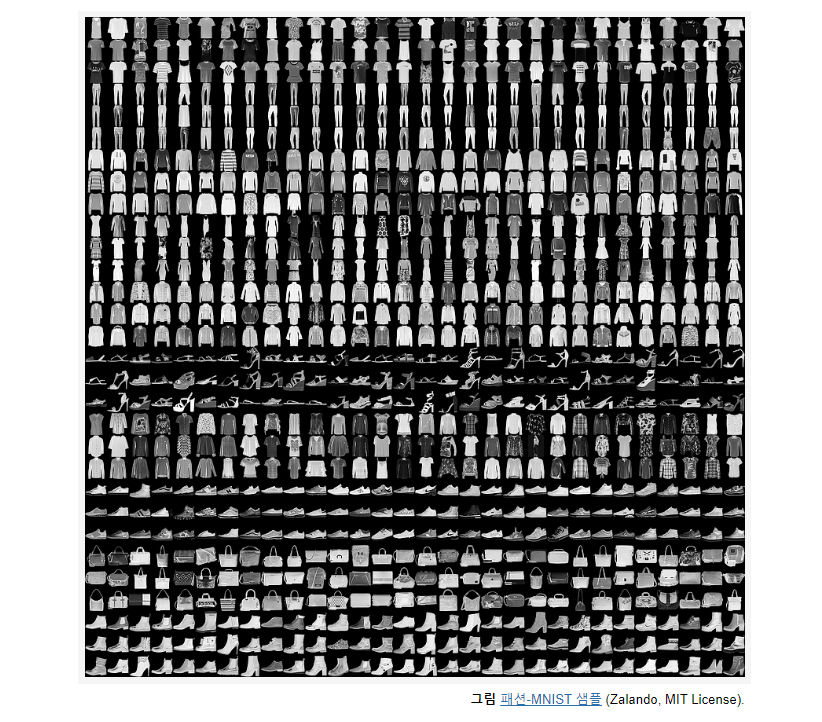

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
class_names = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

##### Data 로딩

In [36]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

##### validatation set  생성

In [37]:
# Train dataset => Train/Validation 분리
from sklearn.model_selection import train_test_split
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size=0.2, stratify=train_label, random_state=0)

In [38]:
train_image.shape, val_image.shape, test_image.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

##### 이미지 확인

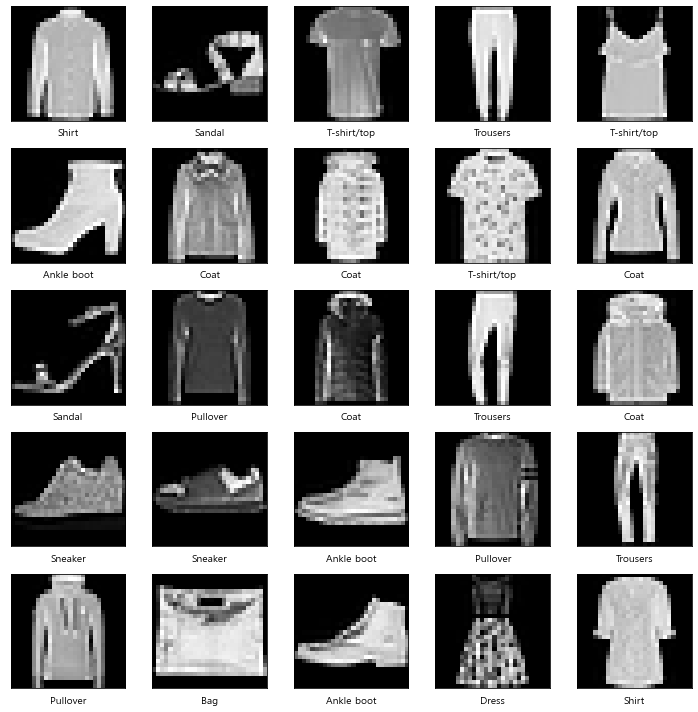

In [39]:
# train_image에서 25개
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.imshow(train_image[i], cmap="Greys")
    plt.imshow(train_image[i], cmap="gray")
    plt.xlabel(class_names[train_label[i]])

plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [40]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

# 각 데이터셋의 데이터 개수를 변수에 저장
N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

#### X, y  전처리
- y값 처리
    - 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리
        - 모델이 각 클래스별 확률을 출력하도록 구현 -> loss계산을 위해 y(ground truth-정답)를 one hot encoding 처리.

In [41]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)
print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


- x값(이미지) 처리
    - dtype을 uint8에서 float32로 변환한다.
    - 0 ~ 1 정규화. X/255.0으로 나눈다.
    

In [42]:
X_train = train_image.astype(np.float32)
X_val = val_image.astype(np.float32)
X_test = test_image.astype(np.float32)

# 255로 나누는 작업은 dataset생성시 map을 이용해서 처리
#  - 실제 할때는 직접 255로 나누도록 한다. map을 사용하는 것은 비효율적이다.

##### Dataset 생성

In [43]:
# map: x, y를 받아서 x는 255로 나눠서 정규화 처리, y는 그대로 반환.
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/255, y))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x, y:(x/255, y)).batch(N_BATCHS)

##### 모델 생성 및 컴파일

In [65]:
def create_fashionmnist_model():
    model = keras.Sequential()
    # Hidden Layer
    # 1. Flatten + input_shape을 지정해서 InputLayer를 추가.
#     model.add(layers.InputLayer((28,28)))
    model.add(layers.Flatten(input_shape=(28,28))) 
#Flatten: 입력데이터의 shape이 다차원 배열형태일때 1차원 배열로 변환 (28,28) -> (28*28,) => DenseLayer의 입력은 1차원배열이어야 한다.
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    
#     output layer: 다중분류 - unit수: class수 (각 unit이 클래스별 확률출력) => activation함수: softmax 
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [66]:
model = create_fashionmnist_model()

# 컴파일
#  다중분류: loss - categorical crossentropy (log loss)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])  # 평가지표 - accuracy 추가. (loss와 accuracy 두개를 검증/최종평가지표로 확인.)

In [67]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               200960    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


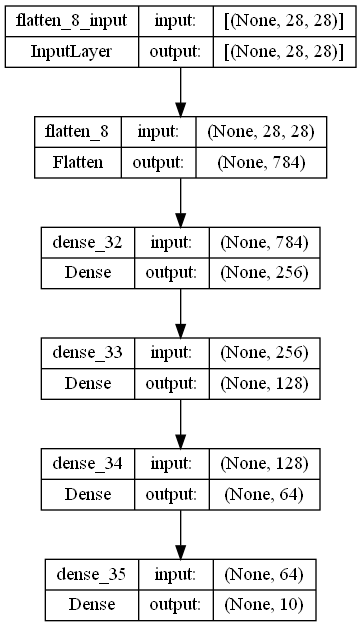

In [68]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

##### Train(학습)

In [69]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=val_dataset)

Epoch 1/20
480/480 [==============================] - 4s 6ms/step - loss: 0.5313 - accuracy: 0.8130 - val_loss: 0.4051 - val_accuracy: 0.8496
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 0.3752 - accuracy: 0.8640 - val_loss: 0.3725 - val_accuracy: 0.8613
Epoch 3/20
480/480 [==============================] - 3s 6ms/step - loss: 0.3403 - accuracy: 0.8757 - val_loss: 0.3533 - val_accuracy: 0.8674
Epoch 4/20
480/480 [==============================] - 3s 6ms/step - loss: 0.3166 - accuracy: 0.8834 - val_loss: 0.3315 - val_accuracy: 0.8760
Epoch 5/20
480/480 [==============================] - 3s 6ms/step - loss: 0.2943 - accuracy: 0.8900 - val_loss: 0.3309 - val_accuracy: 0.8782
Epoch 6/20
480/480 [==============================] - 3s 6ms/step - loss: 0.2797 - accuracy: 0.8956 - val_loss: 0.3220 - val_accuracy: 0.8782
Epoch 7/20
480/480 [==============================] - 3s 6ms/step - loss: 0.2674 - accuracy: 0.8993 - val_loss: 0.2991 - val_accuracy: 0.8901
Epoch 

##### 결과 시각화

- 학습시 epoch별 train/validation set에 대한 검증 결과 시각화

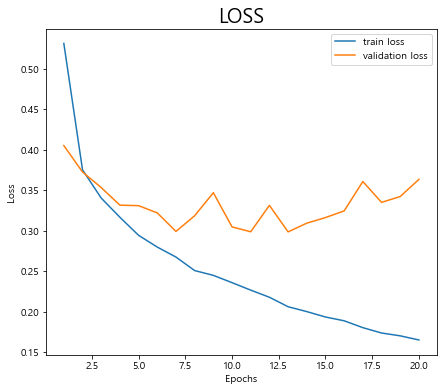

In [70]:
# loss

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

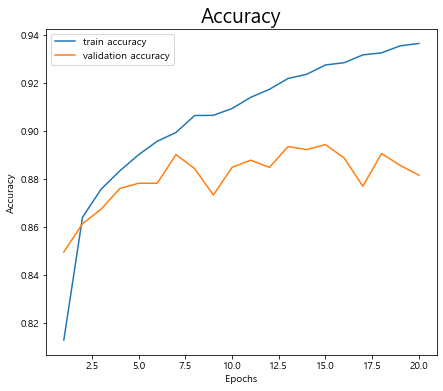

In [71]:
# accuracy

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 최종평가

In [72]:
loss, accuracy = model.evaluate(test_dataset)

100/100 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8749


In [73]:
print(loss, accuracy)

0.4080953896045685 0.8748999834060669


#### 새로운 데이터 추론

In [74]:
new_input = X_test[:5]
new_input = new_input/255.0

In [75]:
X_test.max()

255.0

In [76]:
pred = model.predict(new_input)
print(pred.shape)
pred

1/1 [==============================] - 0s 63ms/step
(5, 10)


array([[5.6470071e-07, 5.3645073e-07, 2.1616447e-06, 6.6518237e-06,
        1.3380397e-06, 4.9312256e-04, 1.9307004e-06, 1.3548901e-03,
        7.7202607e-08, 9.9813867e-01],
       [3.9407372e-05, 3.0191741e-11, 9.9872380e-01, 8.0349549e-09,
        1.0737445e-03, 3.6783926e-15, 1.6299372e-04, 5.3872260e-13,
        1.4217423e-09, 4.3282478e-12],
       [2.2624480e-09, 1.0000000e+00, 1.3289322e-12, 1.8519325e-08,
        9.2958332e-12, 1.0552825e-18, 8.4264734e-11, 2.8369383e-21,
        2.2355053e-13, 1.7599057e-18],
       [2.6908556e-10, 9.9999988e-01, 4.5900913e-13, 1.0257550e-07,
        1.1888909e-12, 8.6645838e-16, 5.9989937e-11, 5.8626524e-19,
        1.4374218e-13, 1.5867559e-17],
       [2.3794267e-04, 1.4515585e-10, 1.4347494e-05, 3.5730975e-06,
        3.7487407e-04, 1.0289762e-12, 9.9936920e-01, 5.8675196e-12,
        5.8710580e-08, 6.1336227e-12]], dtype=float32)

In [77]:
# 예측한 label
pred_class = np.argmax(pred, axis=-1)  #argmax() max값의 index
pred_class # 모델이 예측한 label

array([9, 2, 1, 1, 6], dtype=int64)

In [78]:
test_label[:5]  #정답 label

array([9, 2, 1, 1, 6], dtype=uint8)

In [79]:
pred_class_name = class_names[pred_class]
pred_class_name

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt'],
      dtype='<U11')

In [80]:
pred_proba = np.max(pred, axis=-1)  # 예측한 정답에 대한 확률
pred_proba

array([0.99813867, 0.9987238 , 1.        , 0.9999999 , 0.9993692 ],
      dtype=float32)

In [81]:
for idx, (name, proba) in enumerate(zip(pred_class_name, pred_proba)):
    print(f"{idx}. {name}: {proba:.4f}")

0. Ankle boot: 0.9981
1. Pullover: 0.9987
2. Trousers: 1.0000
3. Trousers: 1.0000
4. Shirt: 0.9994


## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현 (양성 여부 - o:양성, x: 음성) ==> **이번예제**
        - output layer - unit-1, activation: sigmoid (logistic 함수)
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: unit-2, activation: softmax
        - loss: categorical_crossentropy
    

- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)
    - => 양성종양 여부 확인하는 모델.

In [82]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [83]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

#### 하이퍼파라미터, 변수 정의

In [85]:
LEARNING_RATE = 0.001
N_EPOCHS = 150
N_BATCHS = 50

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

#### 데이터 전처리
- 이진 분류
    - 출력 레이어의 unit을 1개, activation 함수를 sigmoid를 사용하는 경우(1일 확률) => y:그대로 사용 (0, 1)
    - 출력 레이어의 unit을 2개, activation 함수를 sofmax를 사용하는 경우(0일 확률, 1일 확률) - 다중분류와 동일하게 구현 => y: one hot encoding ([1,0], [0,1])
- X: 테이블데이터
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [86]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성
- validation/test dataset은 동일하게 파이프라인을 구성
- train dataset: shuffle추가. batch에는 drop_remainder=True로 설정
- map, filter가 추가될 경우 train/validation/test 모두 동일하게 적용

In [87]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

#### model 생성, 컴파일

In [88]:
def create_wisconsin_model():
    model = keras.Sequential()
    model.add(layers.Dense(units=32, activation='relu', input_shape=(30, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
#     output layer - 이진분류(양성(1)의 확률을 출력하도록 구현)
#       unit수-1, activation-sigmoid  (logistic함수) 
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    return model

In [89]:
model = create_wisconsin_model()

# 이진분류(양성의 확률을 출력하도록 구현한 모델)의 loss함수: binary_crossentropy
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Train(학습)

In [90]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)

Epoch 1/150
7/7 [==============================] - 1s 27ms/step - loss: 0.6079 - accuracy: 0.6857 - val_loss: 0.5870 - val_accuracy: 0.8022
Epoch 2/150
7/7 [==============================] - 0s 11ms/step - loss: 0.5478 - accuracy: 0.8257 - val_loss: 0.5405 - val_accuracy: 0.8681
Epoch 3/150
7/7 [==============================] - 0s 10ms/step - loss: 0.4975 - accuracy: 0.9086 - val_loss: 0.4997 - val_accuracy: 0.8791
Epoch 4/150
7/7 [==============================] - 0s 10ms/step - loss: 0.4564 - accuracy: 0.9257 - val_loss: 0.4627 - val_accuracy: 0.8791
Epoch 5/150
7/7 [==============================] - 0s 10ms/step - loss: 0.4156 - accuracy: 0.9429 - val_loss: 0.4251 - val_accuracy: 0.9011
Epoch 6/150
7/7 [==============================] - 0s 10ms/step - loss: 0.3743 - accuracy: 0.9514 - val_loss: 0.3860 - val_accuracy: 0.9011
Epoch 7/150
7/7 [==============================] - 0s 10ms/step - loss: 0.3366 - accuracy: 0.9629 - val_loss: 0.3459 - val_accuracy: 0.9341
Epoch 8/150
7/7 [===

7/7 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.9971 - val_loss: 0.0305 - val_accuracy: 0.9780
Epoch 60/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0189 - accuracy: 0.9971 - val_loss: 0.0307 - val_accuracy: 0.9780
Epoch 61/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0184 - accuracy: 0.9971 - val_loss: 0.0308 - val_accuracy: 0.9780
Epoch 62/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0176 - accuracy: 0.9971 - val_loss: 0.0315 - val_accuracy: 0.9780
Epoch 63/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.9971 - val_loss: 0.0314 - val_accuracy: 0.9780
Epoch 64/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 0.9971 - val_loss: 0.0314 - val_accuracy: 0.9780
Epoch 65/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.9971 - val_loss: 0.0316 - val_accuracy: 0.9780
Epoch 66/150
7/7 [=============

7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0435 - val_accuracy: 0.9780
Epoch 118/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9780
Epoch 119/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9780
Epoch 120/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0441 - val_accuracy: 0.9780
Epoch 121/150
7/7 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9780
Epoch 122/150
7/7 [==============================] - 0s 10ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9780
Epoch 123/150
7/7 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9780
Epoch 124/150
7/7 [======

#### 결과 시각화

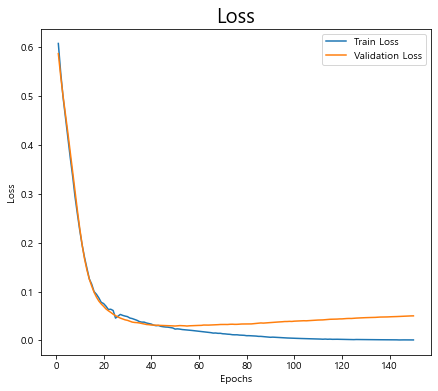

In [91]:
import matplotlib.pyplot as plt
# loss

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

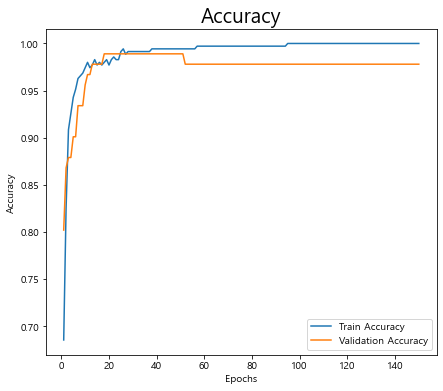

In [92]:
# accuracy
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='Train Accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 최종평가

In [93]:
loss, acc = model.evaluate(test_dataset)

3/3 [==============================] - 0s 5ms/step - loss: 0.1643 - accuracy: 0.9561


In [94]:
print(loss, acc)

0.16426317393779755 0.9561403393745422


#### 새로운 데이터 추론

In [95]:
new_data = X_test[:5]
new_data_scaled = scaler.transform(new_data)

In [97]:
pred = model.predict(new_data_scaled)
pred

1/1 [==============================] - 0s 22ms/step


array([[3.7294008e-08],
       [6.8186356e-36],
       [2.1280138e-09],
       [9.9999595e-01],
       [1.4654170e-10]], dtype=float32)

In [98]:
y_test[:5]

array([0, 0, 0, 1, 0])

In [99]:
threshold = 0.5
result = (pred > threshold).astype(np.int8)  #bool 을 int로 변환 - False: 0, True: 1
result

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int8)

In [100]:
result_label = np.where(pred > threshold, "양성-1", "악성-0")
result_label

array([['악성-0'],
       ['악성-0'],
       ['악성-0'],
       ['양성-1'],
       ['악성-0']], dtype='<U4')

- 모델의 분류 예측 결과를 후처리 -> 모델이 출력한 확률을 class로 변환.
    - 다중분류(모델이 클래스별 확률 출력): np.argmax(예측결과, axis=-1)
    - 이진분류(모델이 양성의 확률을 출력): np.where(pred > threshold, "양성 label", "음성 label")